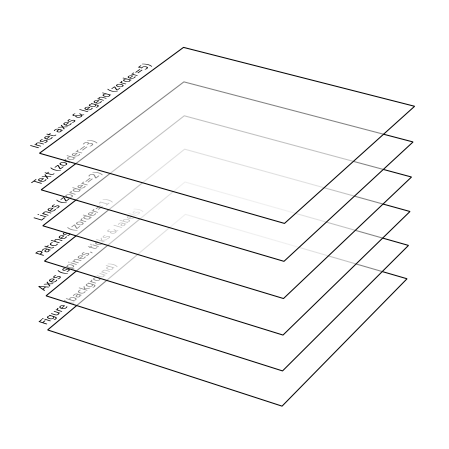

In [7]:
# ----------------------------------------------------------------------------
# Source: https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/zorder.py
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle, PathPatch


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, **kwargs):
    x, y, z = xyz
    if zdir == "y":
        x, y, z = x, z, y
    elif zdir == "x":
        x, y, z = y, z, x
    else:
        x, y, z = x, y, z
    text_path = TextPath((0, 0), s, size=size)
    trans = Affine2D().rotate(angle).translate(x, y)
    p = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=z, zdir=zdir)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d", xticks=[], yticks=[], zticks=[])
ax.set_axis_off()
ax.set_xlim(0, 10), ax.set_ylim(0, 10), ax.set_zlim(0, 5)
for i, text in enumerate(
    [
        "Figure (background)",
        "Axes (spines, ticks & labels)",
        "Patches (zorder=1)",
        "Lines (zorder=2)",
        "Text (zorder=3)",
        "Inset axes & legend (zorder=5)",
    ]
):

    p = Rectangle((0, 0), 10, 10, edgecolor="None", facecolor="white", alpha=0.5)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=i, zdir="z")

    p = Rectangle((0, 0), 10, 10, edgecolor="black", facecolor="None")
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=i, zdir="z")

    text3d(
        ax,
        (-0.25, 0.25, i),
        text,
        zdir="z",
        size=0.5,
        angle=np.pi / 2,
        ec="none",
        fc="k",
    )

plt.show()